# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [15]:
!pip install palmerpenguins

In [97]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = pd.concat([penguins, pd.get_dummies(penguins['sex'], drop_first=True, prefix='sex')], axis=1)
penguins = penguins.drop('sex', axis=1)
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,1


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [98]:
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split

In [108]:
# Define X with three predictors
X = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].values
y = penguins['bill_depth_mm'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Define the linear regression model using the training set
lin_reg = LinearRegression().fit(X_train, y_train)

# Define a pipeline for the quadratic regression
def add_polynomial_features(data):
    bill_length_squared = data[:, 0] ** 2
    return np.column_stack([data, bill_length_squared])

# The transformation function is now integrated into our pipeline
quad_pipeline = Pipeline([
    ('poly_features', FunctionTransformer(add_polynomial_features, validate=False)),
    ('lin_reg', LinearRegression())
])
quad_pipeline.fit(X_train, y_train)
Model1 = quad_pipeline.predict(X_train)


In [100]:
X = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].values
y = penguins['bill_depth_mm'].values


# Define the linear regression model using the training set
lin_reg = LinearRegression().fit(X_train, y_train)

# Define a pipeline for the cubic regression
def add_polynomial_features(data):
    bill_length_cubed = data[:, 0] ** 3
    return np.column_stack([data, bill_length_cubed])

# The transformation function is now integrated into our pipeline
cube_pipeline = Pipeline([
    ('poly_features', FunctionTransformer(add_polynomial_features, validate=False)),
    ('lin_reg', LinearRegression())
])
cube_pipeline.fit(X_train, y_train)
Model2 = cube_pipeline.predict(X_train)

In [101]:
# Define X with 3 predictors
X = penguins[['bill_length_mm', 'flipper_length_mm', 'sex_male']].values
y = penguins['bill_depth_mm'].values

# Define the linear regression model using the training set
lin_reg = LinearRegression().fit(X_train, y_train)

# Define a pipeline for the quadratic regression
def add_polynomial_features(data):
    bill_length_squared = data[:, 0] ** 2
    return np.column_stack([data, bill_length_squared])

# The transformation function is now integrated into our pipeline
quad_pipeline = Pipeline([
    ('poly_features', FunctionTransformer(add_polynomial_features, validate=False)),
    ('lin_reg', LinearRegression())
])
quad_pipeline.fit(X_train, y_train)
Model3 = quad_pipeline.predict(X_train)


In [102]:
# Define X with three predictors
X = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']].values
y = penguins['bill_depth_mm'].values

# Define the linear regression model using the training set
lin_reg = LinearRegression().fit(X_train, y_train)

# Define a pipeline for the regression
def add_polynomial_features(data):
    pow_5 = data[:] ** 5
    return np.column_stack([data, pow_5])

# The transformation function is now integrated into our pipeline
five_pipeline = Pipeline([
    ('poly_features', FunctionTransformer(add_polynomial_features, validate=False)),
    ('lin_reg', LinearRegression())
])
five_pipeline.fit(X_train, y_train)
Model4 = five_pipeline.predict(X_train)


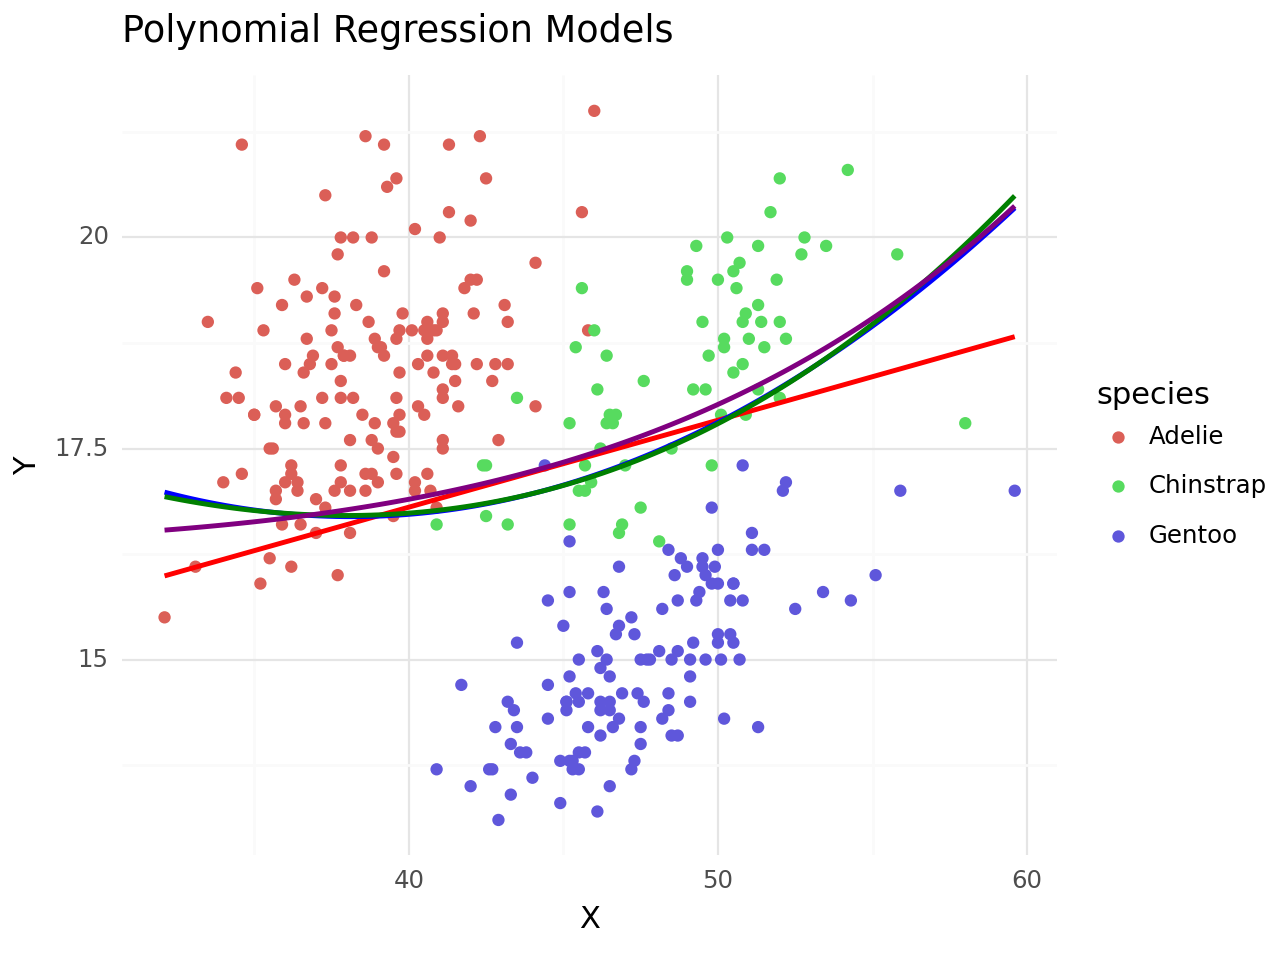

In [103]:
def plot_all_models(pipelines, X_train, y_train, feature_index=0, resolution=100):
    p = (ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm'))
         + geom_point(aes(color='species'))  # original data
         + labs(title='Polynomial Regression Models', x='X', y='Y')
         + theme_minimal()
    )

    # Define colors for each model
    colors = ['red', 'blue', 'green', 'purple']  # One color per model
    feature_range = np.linspace(X_train[:, feature_index].min(), X_train[:, feature_index].max(), resolution)
    fixed_features = np.mean(X_train, axis=0)

    for i, (pipeline, color) in enumerate(zip(pipelines, colors)):
        grid = np.tile(fixed_features, (resolution, 1))
        grid[:, feature_index] = feature_range

        # Use the pipeline to make predictions across the grid
        predictions = pipeline.predict(grid)

        # Create a DataFrame for plotting predictions
        plot_df = pd.DataFrame({
            'feature': feature_range,
            'prediction': predictions
        })
        p += geom_line(plot_df, aes(x='feature', y='prediction'), color=color, size=1)

    return p

def identity_features(X):
    return X

# Linear regression pipeline
lin_reg_pipeline = Pipeline([
    ('identity_features', FunctionTransformer(identity_features, validate=False)),
    ('lin_reg', LinearRegression())
])

# fit this pipeline to training data
lin_reg_pipeline.fit(X_train, y_train)

# Define pipelines and plot all models
pipelines = [lin_reg_pipeline, quad_pipeline, cube_pipeline, five_pipeline]
plot = plot_all_models(pipelines, X_train, y_train)
plot.draw()


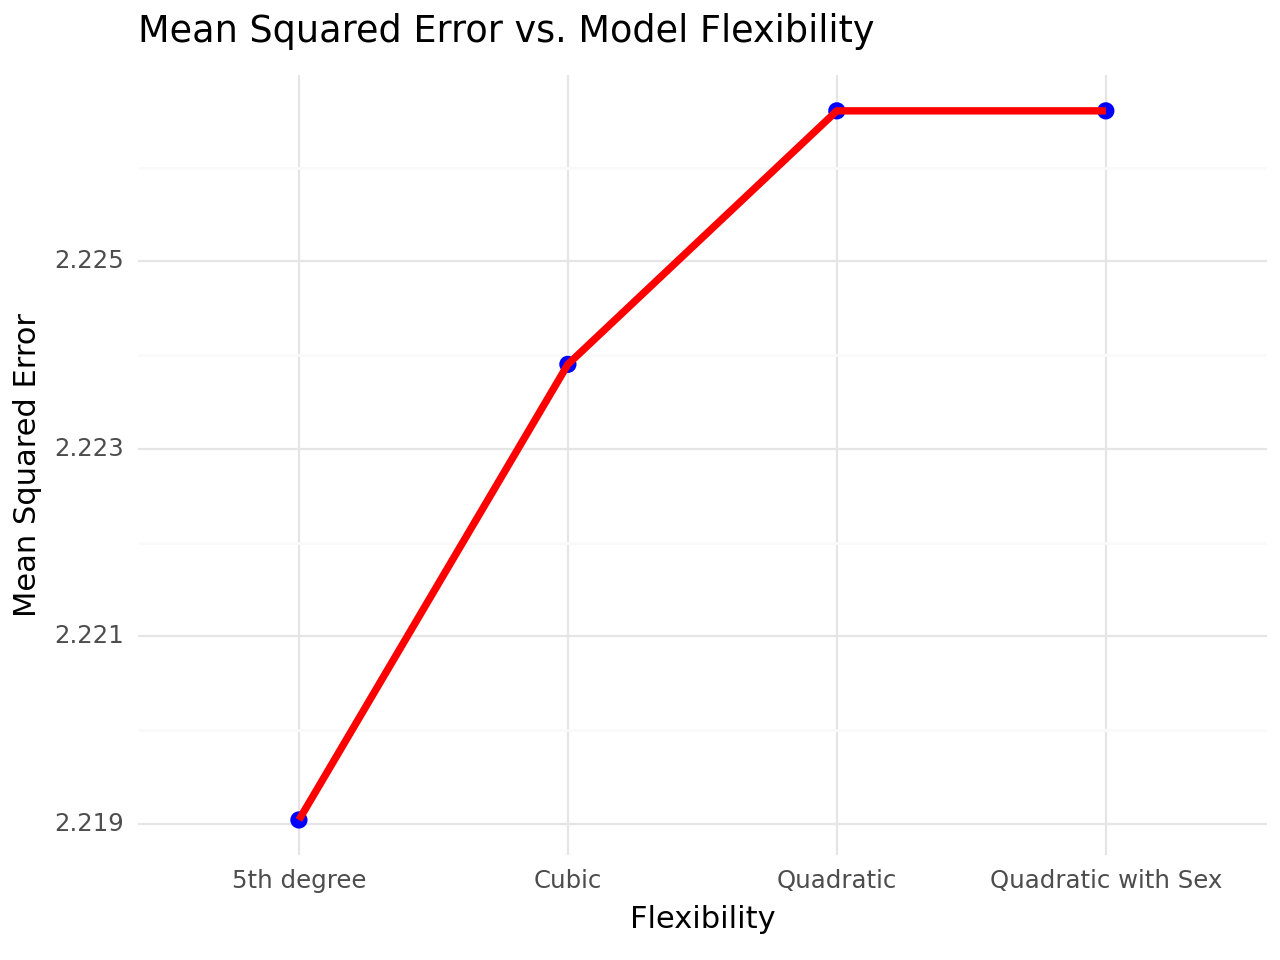

In [107]:
from sklearn.metrics import mean_squared_error

# Calculate MSE for each model
mse_values = {
    "Quadratic": mean_squared_error(y_train, Model1),
    "Cubic": mean_squared_error(y_train, Model2),
    "Quadratic with Sex": mean_squared_error(y_train, Model3),
    "5th degree": mean_squared_error(y_train, Model4)
}

flexibility = list(mse_values.keys())
mse = list(mse_values.values())

# Create a DataFrame for the plot
mse_df = pd.DataFrame({
    'Flexibility': flexibility,
    'MSE': mse
})

plot = (
    ggplot(mse_df, aes(x='Flexibility', y='MSE'))
    + geom_point(color="blue", size=2.5)
    + geom_line(aes(group=1), color="red", size=1.5)
    + labs(title="Mean Squared Error vs. Model Flexibility",
           x="Flexibility",
           y="Mean Squared Error")
    + theme_minimal()
)

print(plot)

I was unsure how to make the second graph from figure 1, here's the best I could do.  It is apparent that the 5th degree model overfit the most based on MSE, and the others were slightly underfit.  Would say that none of the models are very good at predicting Bill Depth, but the best would be the 5th degree model.